In [37]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

Import libraries

In [38]:
image_data = np.load('images_data.npy')
label_data = np.load('labels.npy')

Load image data from the numpy arrays

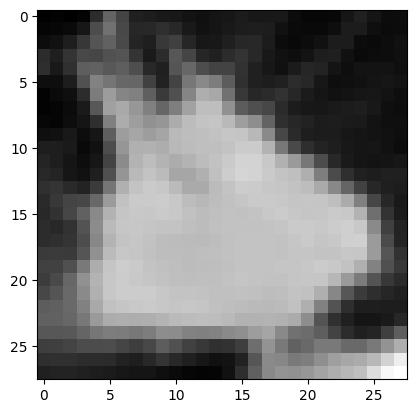

In [39]:
nodule = image_data[1, :, :]
nodule = np.reshape(nodule, (28,28))
from matplotlib import pyplot as plt
plt.imshow(nodule, cmap='gray')
plt.show()

Visualise a nodule by changing the number in the nodule function

In [40]:
image_data = image_data.reshape(image_data.shape[0], 28, 28, 1)

Reshape the image data so that the colour channel is included in the arrays.
The images are in greyscale so therefore only one colour channel is used.

In [41]:
imageTrain, imageTest, labelsTrain, labelsTest = train_test_split(image_data, label_data, test_size=0.2)
labelsTrain = np.argmax(labelsTrain, axis=1)
labelsTest = np.argmax(labelsTest, axis=1)

Split data into training and testing sets

In [42]:
model = Sequential()

model.add(Conv2D(32, (3,3), strides=1, activation = 'relu', input_shape=(28,28,1))) #input shape is 28 by 28 as the provided iamges are 28 by 28 pixels
model.add(MaxPooling2D())
model.add(BatchNormalization(synchronized=True))


model.add(Flatten())
model.add(Dense (64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense (64, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation = 'sigmoid'))

Model Building

In [43]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Add optimiser parameter (using Adam optimsier)

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 13, 13, 32)        128       
 chNormalization)                                                
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                346176    
                                                                 
 dropout_6 (Dropout)         (None, 64)               

Summary of model that has been built

In [45]:
hist = model.fit(imageTrain, labelsTrain, epochs = 10, validation_data = (imageTest,labelsTest))

Epoch 1/10


25/25 [==============================] - 3s 38ms/step - loss: 0.6051 - accuracy: 0.7163 - val_loss: 0.6232 - val_accuracy: 0.7050
Epoch 2/10
25/25 [==============================] - 1s 30ms/step - loss: 0.4834 - accuracy: 0.8050 - val_loss: 1.1792 - val_accuracy: 0.6700
Epoch 3/10
25/25 [==============================] - 1s 31ms/step - loss: 0.3844 - accuracy: 0.8150 - val_loss: 0.8499 - val_accuracy: 0.7250
Epoch 4/10
25/25 [==============================] - 1s 30ms/step - loss: 0.3610 - accuracy: 0.8288 - val_loss: 0.7335 - val_accuracy: 0.7850
Epoch 5/10
25/25 [==============================] - 1s 31ms/step - loss: 0.3163 - accuracy: 0.8537 - val_loss: 0.7609 - val_accuracy: 0.7400
Epoch 6/10
25/25 [==============================] - 1s 32ms/step - loss: 0.2788 - accuracy: 0.8725 - val_loss: 0.4965 - val_accuracy: 0.8000
Epoch 7/10
25/25 [==============================] - 1s 30ms/step - loss: 0.2638 - accuracy: 0.8763 - val_loss: 1.1353 - val_accuracy: 0.7550
Epoch 8/10
25/25 [======

Fitting the model using the validation data

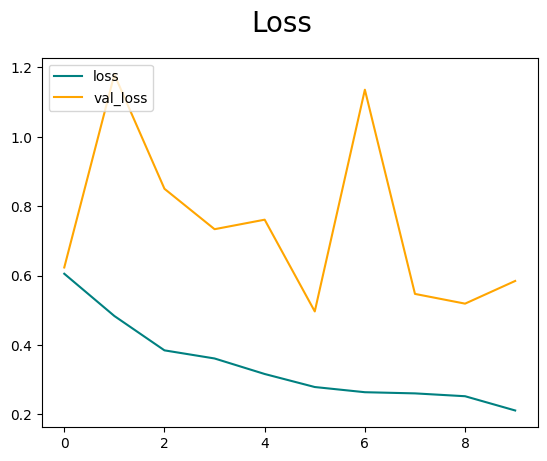

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the loss function and validation loss of the model

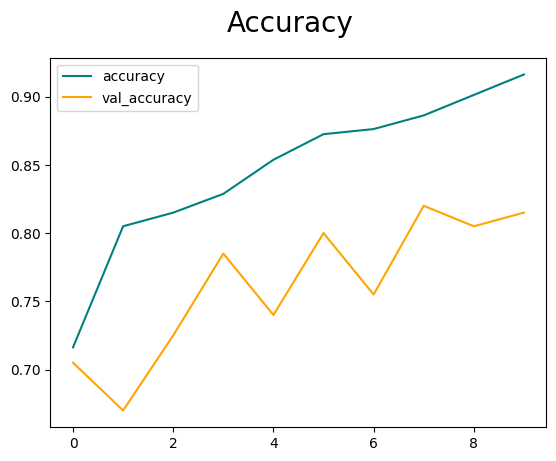

In [47]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the accuracy and validation accuracy of the model

In [48]:
model.save(os.path.join('models', 'other.h5'))

Saving model 